<a href="https://colab.research.google.com/github/arumshin-dev/python_conda_jupyter/blob/main/codeit/%EB%AF%B8%EC%85%984.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 구글 드라이브 연동
# from google.colab import drive
# drive.mount('/content/drive')

# 한글처리
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# **스프린트 미션 소개**

이번 미션에서는 포르투갈 은행의 마케팅 데이터를 분석해볼 예정입니다. 이 실습에서는 결정 트리와 앙상블 기법을 사용하여 분류 모델을 구축하고, 마케팅 캠페인의 효율성을 높이는 전략을 도출해 보겠습니다.

### **미션 배경**

여러분은 지금부터 포르투갈 은행의 마케팅 담당자입니다. 데이터는 2008년부터 2010년까지의 은행 마케팅 캠페인 데이터를 포함하고 있습니다. 여러분의 목표는 이 데이터를 통해 고객이 **정기 예금을 가입할 가능성**을 예측하고, 이를 통해 마케팅 캠페인의 효율성을 높이는 것입니다. 마케팅 담당자로서 정기 예금과 관련이 있는 요소들을 파악해보고, 고객의 행동을 이해해보세요. 어떤 상황에서 어떤 고객들이 정기 예금을 가입할까요?

이번 미션의 최종 목표는 **가장 정확한 분류 모델을 개발하여 고객이 정기 예금을 가입할지 여부를 예측**하고, **그 모델을 통해 도출한 인사이트를 바탕으로 비즈니스 전략을 제시하는 것**입니다.

- **예시 분석 질문**
    
    어떤 방향으로 분석해야 할지 고민되신다면, 예시 질문들을 바탕으로 다양한 관점에서 데이터를 탐색하고 분석해보세요.
    
    1. 특정 직업군에서 정기 예금 가입률이 높은가요?
    2. 교육 수준에 따라 정기 예금 가입률이 달라지나요?
    3. 과거 마케팅 캠페인의 성공 여부가 현재 캠페인의 성공에 영향을 미치나요?
    4. 월별 정기 예금 가입률의 차이는 무엇인가요?
    5. 고객의 나이와 정기 예금 가입 여부 간의 관계는 무엇인가요?
    6. 정기 예금 가입을 예측하기 위해 사용할 수 있는 가장 중요한 변수는 무엇인가요?

### **데이터 소개**

- 사용 데이터셋: [bank-additional-full.csv](https://bakey-api.codeit.kr/api/files/resource?root=static&seqId=10725&version=2&directory=/bank-additional-full.csv&name=bank-additional-full.csv)

| **컬럼명** | **설명** |
| --- | --- |
| **age** | **나이 (숫자)** |
| **job** | **직업 (범주형)** |
| **marital** | **결혼 여부 (범주형)** |
| **education** | **교육 수준 (범주형)** |
| **default** | **신용 불량 여부 (범주형)** |
| **housing** | **주택 대출 여부 (범주형)** |
| **loan** | **개인 대출 여부 (범주형)** |
| **contact** | **연락 유형 (범주형)** |
| **month** | **마지막 연락 월 (범주형)** |
| **day_of_week** | **마지막 연락 요일 (범주형)** |
| **duration** | **마지막 연락 지속 시간, 초 단위 (숫자)** |
| **campaign** | **캠페인 동안 연락 횟수 (숫자)** |
| **pdays** | **이전 캠페인 후 지난 일수 (숫자)** |
| **previous** | **이전 캠페인 동안 연락 횟수 (숫자)** |
| **poutcome** | **이전 캠페인의 결과 (범주형)** |
| **emp.var.rate** | **고용 변동률 (숫자)** |
| **cons.price.idx** | **소비자 물가지수 (숫자)** |
| **cons.conf.idx** | **소비자 신뢰지수 (숫자)** |
| **euribor3m** | **3개월 유리보 금리 (숫자)** |
| **nr.employed** | **고용자 수 (숫자)** |
| **y** | **정기 예금 가입 여부 ('y' 또는 'no'로 표시됨)** |

해당 데이터는 UC Irvine Machine Learning Repository에서 제공하는 **Bank Marketing([링크](https://archive.ics.uci.edu/dataset/222/bank+marketing))** 데이터 입니다. 여러 데이터 중 2014년 아래 논문에서 사용된 데이터를 선택하였습니다. 데이터에 대해서 더 자세히 알고 싶은 분들은 아래 데이터 설명 txt파일과 논문을 확인해보시는 걸 추천드립니다.

- 데이터 설명
    
    [bank-additional-names.txt](https://bakey-api.codeit.kr/api/files/resource?root=static&seqId=10725&version=2&directory=/bank-additional-names.txt&name=bank-additional-names.txt)
    
- 데이터 출처
    
    Moro, S., Cortez, P., & Rita, P. (2014). A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001
    

# **제출 내용**

- 분석과정 및 분석 결과가 포함된 `Colab Notebook`
- 가설, 분석의 전개, 인사이트 등이 포함된 `보고서`

# **미션 결과물 제출**

구글 드라이브의 결과물 제출 폴더 > `미션4` 폴더에 `분석 보고서`와 `Colab Notebbok`을 제출해주세요.

제출 시 `{팀명}_{성함}`으로 상위 폴더를 생성한 후, 폴더 안에 `분석 보고서`와 `Colab Notebook`을 제출 부탁드립니다.

제출 시 파일명은 `미션4_{팀명}_{성함}.pdf`와 `미션4_{팀명}_{성함}.ipynb`으로 기재 부탁드립니다.

- 예시: `미션4_1팀_홍길동.pdf`, `미션4_1팀_홍길동.ipynb`

인용 요청:
이 데이터세트는 연구용으로 공개되어 있습니다. 자세한 내용은 [Moro et al., 2014]에 설명되어 있습니다.
이 데이터베이스를 사용하려면 다음 인용문을 포함해 주십시오.

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. 은행 텔레마케팅 성공 예측을 위한 데이터 기반 접근법. 의사결정 지원 시스템, 출판 예정, http://dx.doi.org/10.1016/j.dss.2014.03.001

출처: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
[참고문헌] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

1. 제목: 은행 마케팅(사회적/경제적 맥락 포함)

2. 출처
작성자: Sérgio Moro(ISCTE-IUL), Paulo Cortez(Minho 대학교), Paulo Rita(ISCTE-IUL) @ 2014

3. 이전 사용 사례:

전체 데이터세트(bank-additional-full.csv)는 다음에서 설명 및 분석되었습니다.

S. Moro, P. Cortez, P. Rita. 데이터 기반 접근법을 통한 은행 텔레마케팅 성공 예측. 의사결정 지원 시스템(2014), doi:10.1016/j.dss.2014.03.001.

4. 관련 정보:

이 데이터셋은 "은행 마케팅" UCI 데이터셋을 기반으로 합니다(설명은 http://archive.ics.uci.edu/ml/datasets/Bank+Marketing에서 확인하세요).
이 데이터는 포르투갈 은행(Banco de Portugal)에서 발행하고 https://www.bportugal.pt/estatisticasweb에서 공개적으로 제공되는 5가지 새로운 사회경제적 특징/속성(약 1천만 명 인구 국가의 전국 지표)을 추가하여 더욱 풍부해졌습니다.
이 데이터셋은 [Moro et al., 2014]에서 사용된 데이터셋과 거의 동일합니다(개인정보 보호 문제로 모든 속성을 포함하지는 않습니다).
rminer 패키지와 R 도구(http://cran.r-project.org/web/packages/rminer/)를 사용하여, 5가지 새로운 사회적 및 경제적 속성(여기에서 확인 가능)을 추가했을 때, 통화 시간이 포함되지 않은 경우에도 성공 예측이 상당히 향상되는 것을 확인했습니다. 참고: R에서 다음 명령어를 사용하여 파일을 읽을 수 있습니다. d=read.table("bank-additional-full.csv",header=TRUE,sep=";")

zip 파일에는 두 가지 데이터세트가 포함되어 있습니다.
1) 모든 예시가 날짜순(2008년 5월부터 2010년 11월까지)으로 정렬된 bank-additional-full.csv
2) bank-additional-full.csv에서 무작위로 선택된 10%(4119개)의 예시가 포함된 bank-additional.csv
가장 작은 데이터세트는 계산량이 더 많은 머신러닝 알고리즘(예: SVM)을 테스트하기 위해 제공됩니다.

이진 분류의 목표는 고객이 은행 정기예금(변수 y)에 가입할지 여부를 예측하는 것입니다.

5. 인스턴스 수: bank-additional-full.csv의 경우 41,188개

6. 속성 수: 20개 + 출력 속성

7. 속성 정보:

    자세한 내용은 [Moro et al., 2014]를 참조하십시오.

    입력 변수:
    ## 은행 고객 데이터:
    1 - 연령(숫자형)

    2 - 직업: 직업 유형(범주형: "관리직", "생산직", "기업가", "가사도우미", "경영", "은퇴", "자영업자", "서비스", "학생", "기술자", "실업자", "모름")

    3 - 결혼 여부: 결혼 상태(범주형: "이혼", "기혼", "미혼", "모름"; 참고: "이혼"은 이혼 또는 사별을 의미함)

    4 - 교육 수준(범주형: "기본 4년", "기본 6년", "기본 9년", "고졸", "문맹", "전문 과정", "대학 학위", "모름")

    5 - 채무 불이행: 채무 불이행 여부(범주형: "아니요", "예", "모름")

    6 - 주택: 주택 대출 여부(범주형: "아니요", "예", "모름")

    7 - 대출 여부: 개인 대출 여부 (범주형: "아니요", "예", "알 수 없음")
    ## 현재 캠페인의 마지막 연락과 관련됨:
    8 - 연락: 연락 유형 (범주형: "휴대폰", "전화")

    9 - 월: 마지막 연락 월 (범주형: "1월", "2월", "3월", ..., "11월", "12월")

    10 - 요일: 마지막 연락 요일 (범주형: "월", "화", "수", "목", "금")

    11 - 기간: 마지막 연락 시간(초) (숫자). 중요 참고: 이 속성은 출력 목표에 큰 영향을 미칩니다 (예: 기간=0이면 y="아니요"). 하지만 통화가 실행되기 전에는 기간을 알 수 없습니다. 또한 통화 종료 후 y는 분명히 알 수 있습니다. 따라서 이 입력은 벤치마크 목적으로만 포함되어야 하며, 현실적인 예측 모델을 구축하려는 경우에는 제외해야 합니다.
    ## 기타 속성:
    12 - campaign: 이 캠페인 기간 동안 이 클라이언트에 대해 수행된 연락 수(숫자, 마지막 연락 포함)

    13 - pdays: 이전 캠페인에서 클라이언트에게 마지막으로 연락한 후 경과한 일수(숫자, 999는 클라이언트에게 이전에 연락한 적이 없음을 의미)

    14 - previous: 이 캠페인 이전에 이 클라이언트에 대해 수행된 연락 수(숫자)

    15 - poutcome: 이전 마케팅 캠페인의 결과(범주형: "실패", "존재하지 않음", "성공")

    ## 사회 및 경제적 맥락 속성
    16 - emp.var.rate: 고용 변동률 - 분기별 지표(숫자)

    17 - cons.price.idx: 소비자물가지수 - 월별 지표(숫자)

    18 - cons.conf.idx: 소비자 신뢰 지수 - 월별 지표(숫자)

    19 - euribor3m: euribor 3개월 비율 - 일별 지표(숫자)

    20 - nr.employed: 직원 수 - 분기별 지표(숫자형)

    ## 출력 변수(목표):

    21 - y - 고객이 정기예금에 가입했습니까? (이진수: "예", "아니요")

8. 누락된 속성 값: 일부 범주형 속성에는 여러 개의 누락된 값이 있으며, 모두 "알 수 없음" 레이블로 코딩되어 있습니다. 이러한 누락된 값은 가능한 클래스 레이블로 처리하거나 삭제 또는 대입 기법을 사용하여 처리할 수 있습니다.

#0 라이브러리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, balanced_accuracy_score,
    matthews_corrcoef
)
from sklearn.metrics import precision_recall_curve

from imblearn.over_sampling import SMOTE

# 모델들
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler

#1 데이터 로드:bank


In [ ]:
# 데이터 불러오기
url="https://bakey-api.codeit.kr/api/files/resource?root=static&seqId=10725&version=2&directory=/bank-additional-full.csv&name=bank-additional-full.csv"
bank = pd.read_csv(url, sep=';')
# 데이터 크기
print(bank.shape)
# 컬럼들
print('컬럼 목록:', bank.columns)
# 첫 5행 확인
bank.head()

(41188, 21)
컬럼 목록: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#2 기초 탐색

In [ ]:
# 데이터 타입 및 결측치 정보
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# 수치형 변수 기초 통계
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# 컬럼 별 값들
numeric_vars=['age', 'duration', 'campaign', 'pdays', 'previous', #정수
              'emp.var.rate', 'cons.price.idx','cons.conf.idx',
              'euribor3m', 'nr.employed'#소수
              ]
categorical_vars=['job', 'marital', 'education', 'default', 'housing', 'loan','contact',
                  'poutcome'
                  ]
date_vars=['month', 'day_of_week']
target_var = ['y']
for i,col in enumerate(bank.columns):
    print(f'{i+1:2d}.{col}')
    if col in numeric_vars:
        # print(sorted(bank[col].unique()))
        print(bank[col].min(),f'~{bank[col].mean()}~', bank[col].max())
    else:
        print(bank[col].unique())
    print('-'*50)

 1.age
17 ~40.02406040594348~ 98
--------------------------------------------------
 2.job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
--------------------------------------------------
 3.marital
['married' 'single' 'divorced' 'unknown']
--------------------------------------------------
 4.education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
--------------------------------------------------
 5.default
['no' 'unknown' 'yes']
--------------------------------------------------
 6.housing
['no' 'yes' 'unknown']
--------------------------------------------------
 7.loan
['no' 'yes' 'unknown']
--------------------------------------------------
 8.contact
['telephone' 'cellular']
--------------------------------------------------
 9.month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
---------------

## 컬럼 이상
'job', 'marital', 'education',
'default', 'housing', 'loan'-unknown 처리

contact -telephone/cellular

'poutcome'의 'nonexistent' ?

duration 제외

pdays 999 처리

campaign 최대 이상함

previous 최대

month, day_of_week 날짜형으로 바꾸기

타깃 변수 y 숫자형 0/1로 바꾸기



#3 타깃 분석

,proportion
y,
no,0.887346
yes,0.112654


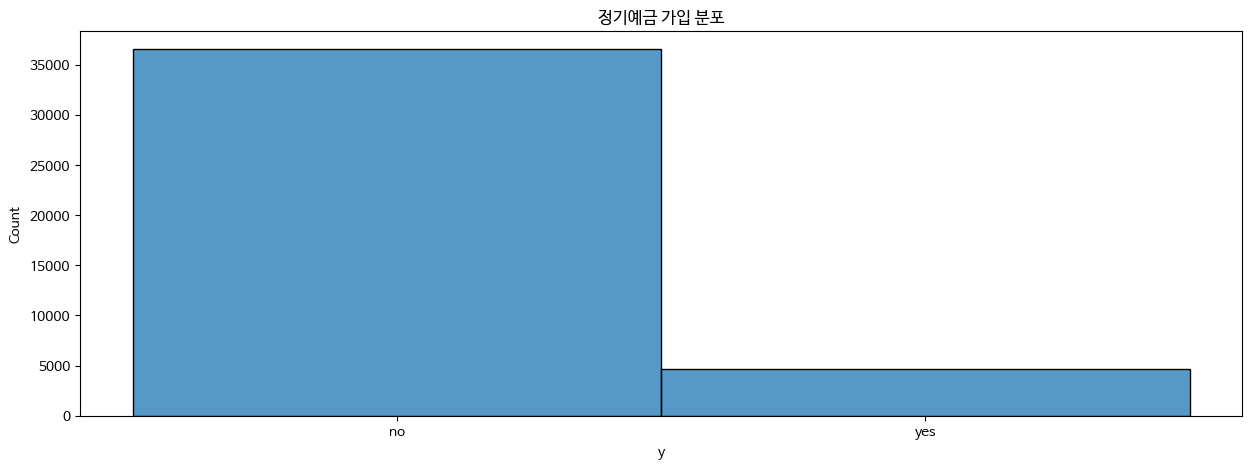

In [ ]:
plt.figure(figsize=(15, 5))
# plt.subplot(1, 3, 1)
sns.histplot(bank['y'])
plt.title('정기예금 가입 분포')
bank['y'].value_counts(normalize=True)

no 가 88% 넘음 클래스 불균형

불균형이 심하여- SMOTE나 class_weight 옵션 고려

## 수치형


=== 수치형 변수별 타깃 관계 ===
age: Yes평균=40.91, No평균=39.91, 차이=1.00
duration: Yes평균=553.19, No평균=220.84, 차이=332.35
campaign: Yes평균=2.05, No평균=2.63, 차이=0.58
pdays: Yes평균=792.04, No평균=984.11, 차이=192.08
previous: Yes평균=0.49, No평균=0.13, 차이=0.36
emp.var.rate: Yes평균=-1.23, No평균=0.25, 차이=1.48
cons.price.idx: Yes평균=93.35, No평균=93.60, 차이=0.25
cons.conf.idx: Yes평균=-39.79, No평균=-40.59, 차이=0.80
euribor3m: Yes평균=2.12, No평균=3.81, 차이=1.69
nr.employed: Yes평균=5095.12, No평균=5176.17, 차이=81.05


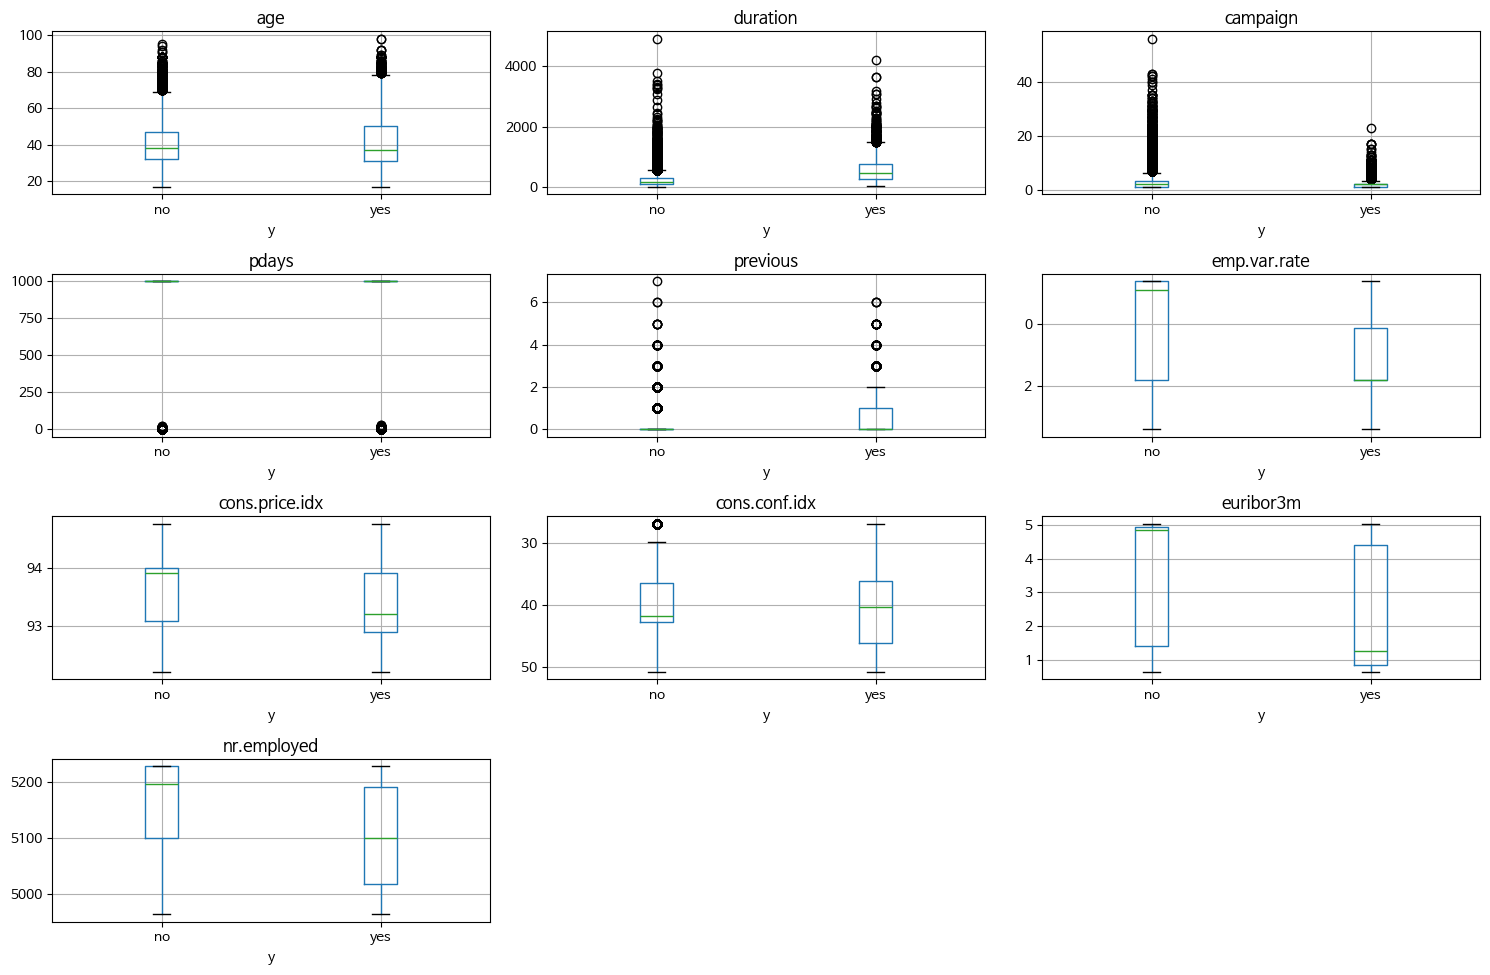

In [ ]:
# 수치형 변수와 타깃의 관계
numeric_cols = bank.select_dtypes(include=np.number).columns

print("=== 수치형 변수별 타깃 관계 ===")
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i+1)

    # 박스플롯으로 분포 비교
    bank.boxplot(column=col, by='y', ax=plt.gca())
    plt.title(f'{col}')
    plt.suptitle('')  # 기본 제목 제거

    # 평균값 비교
    yes_mean = bank[bank['y']=='yes'][col].mean()
    no_mean = bank[bank['y']=='no'][col].mean()
    print(f"{col}: Yes평균={yes_mean:.2f}, No평균={no_mean:.2f}, 차이={abs(yes_mean-no_mean):.2f}")

plt.tight_layout()
plt.show()


- duration 통화시간 길수록 가입
- campaign 연락횟수 많으면 안함
- previous 이전 캠페인 고객 또 가입

## 범주형

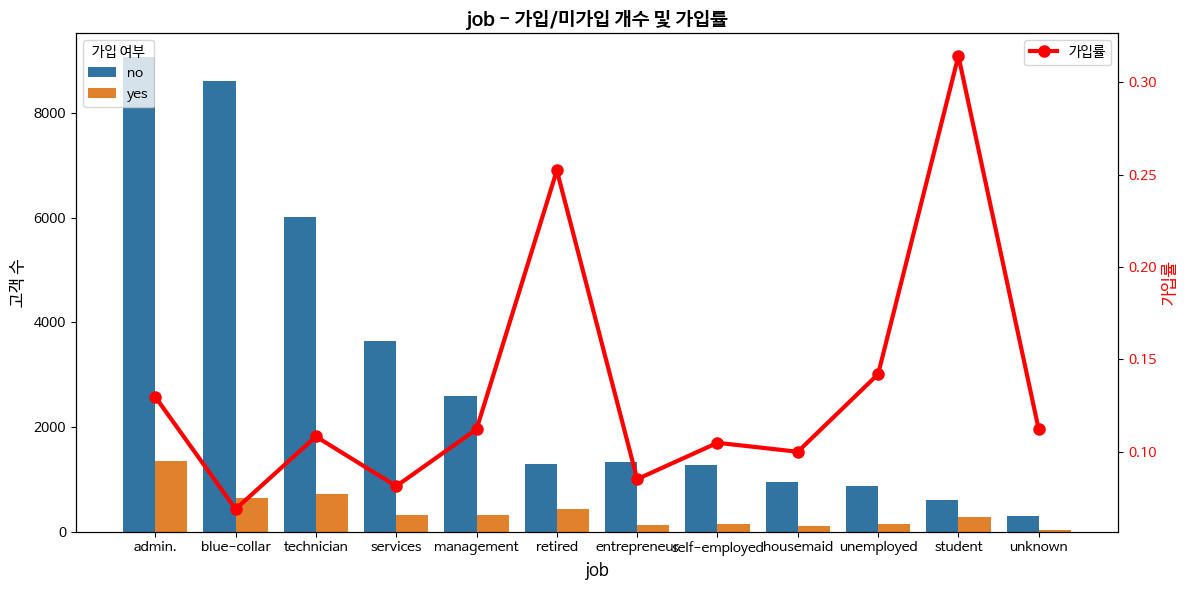

job: 최고 가입률 = student(0.314)
      최저 가입률 = blue-collar(0.069)



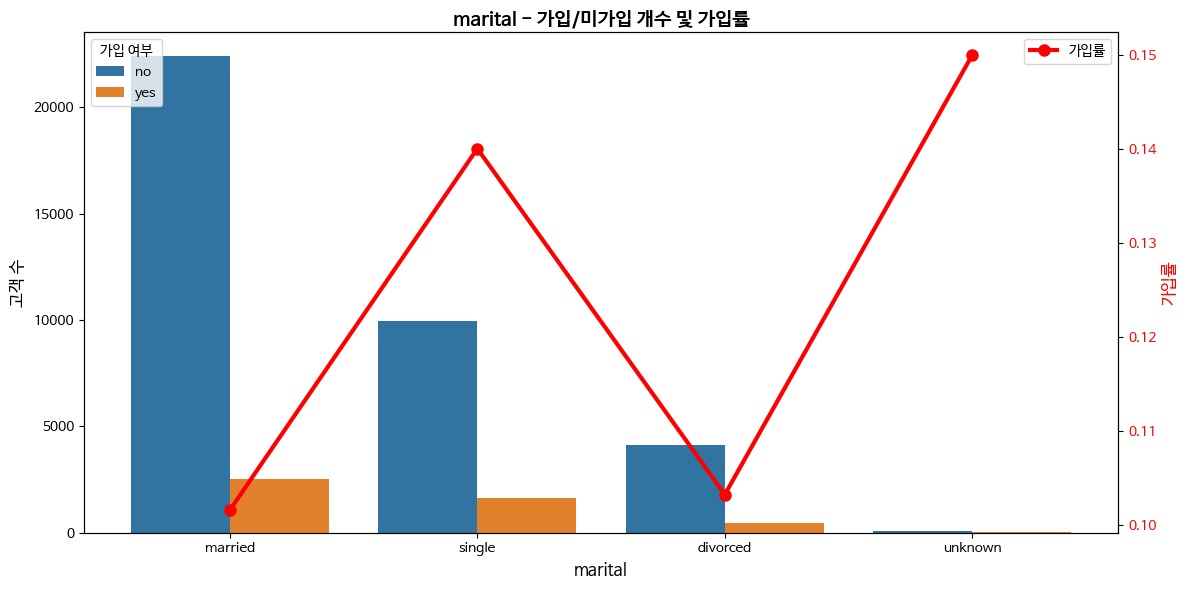

marital: 최고 가입률 = unknown(0.150)
      최저 가입률 = married(0.102)



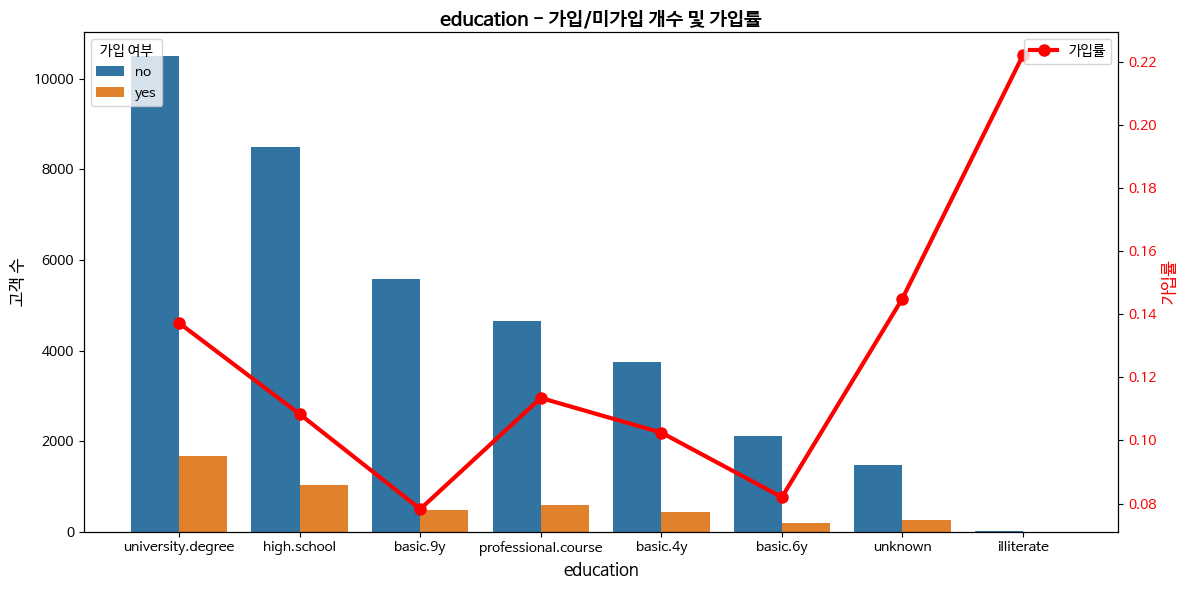

education: 최고 가입률 = illiterate(0.222)
      최저 가입률 = basic.9y(0.078)



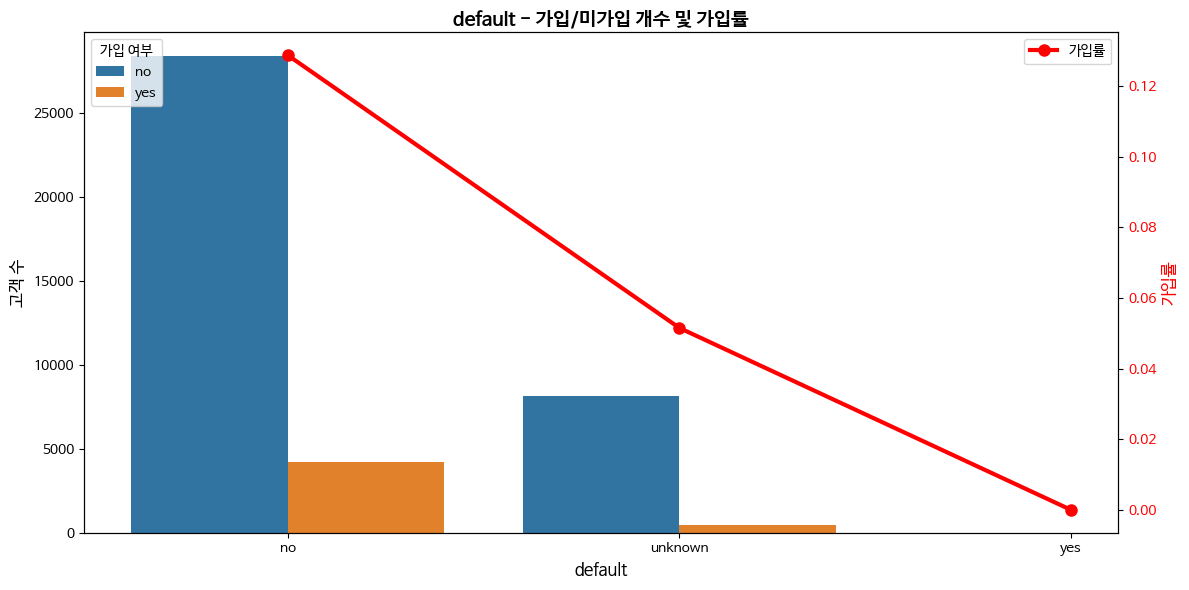

default: 최고 가입률 = no(0.129)
      최저 가입률 = yes(0.000)



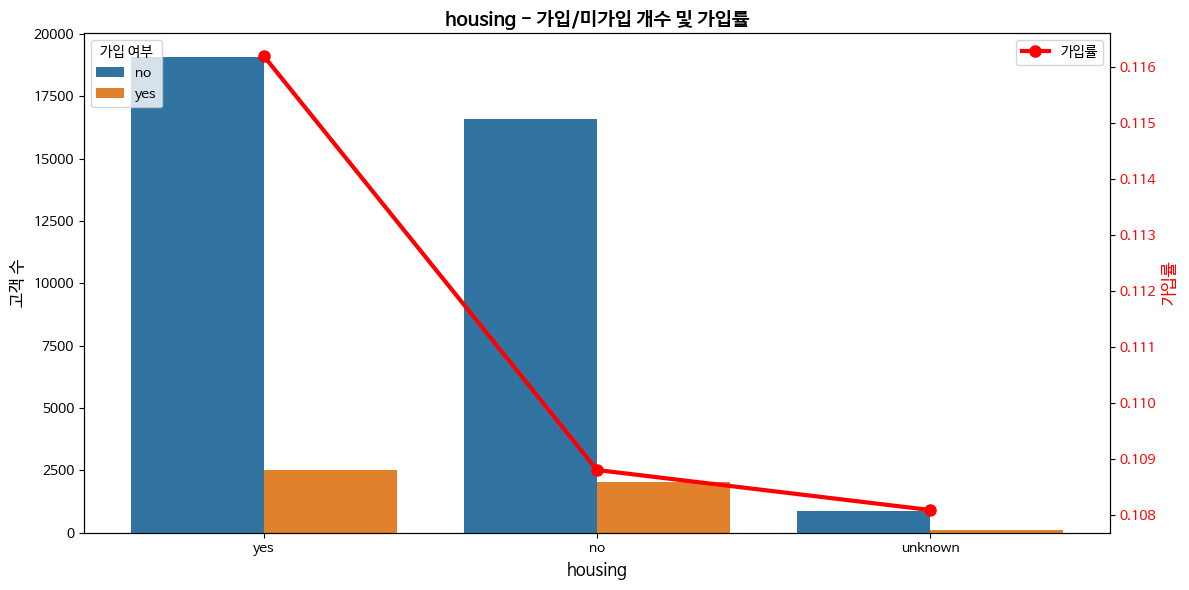

housing: 최고 가입률 = yes(0.116)
      최저 가입률 = unknown(0.108)



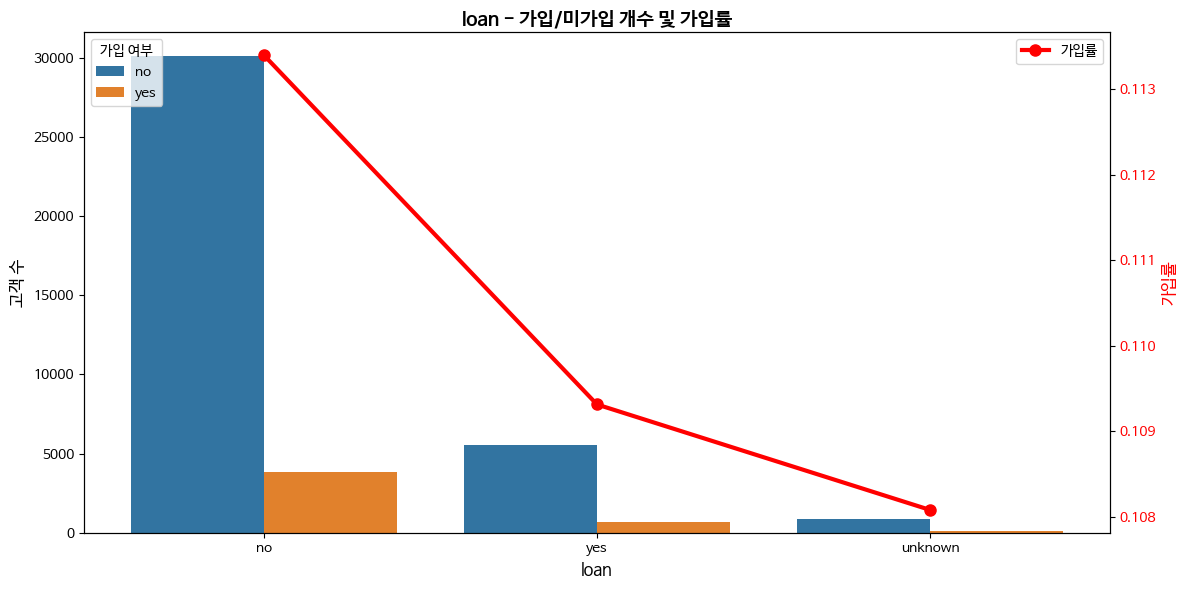

loan: 최고 가입률 = no(0.113)
      최저 가입률 = unknown(0.108)



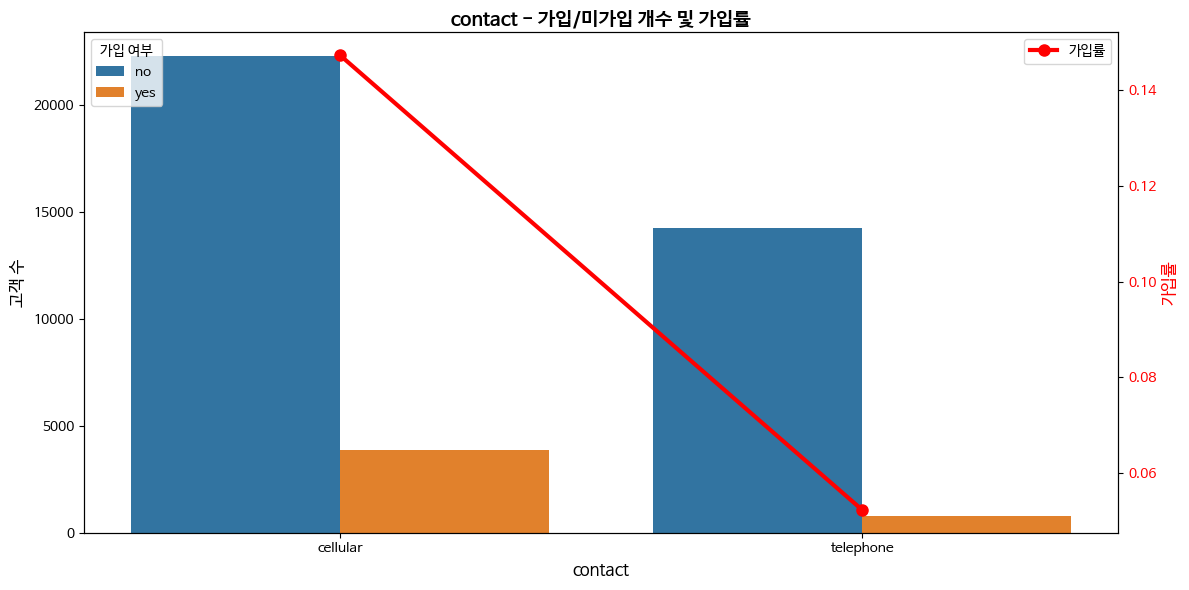

contact: 최고 가입률 = cellular(0.147)
      최저 가입률 = telephone(0.052)



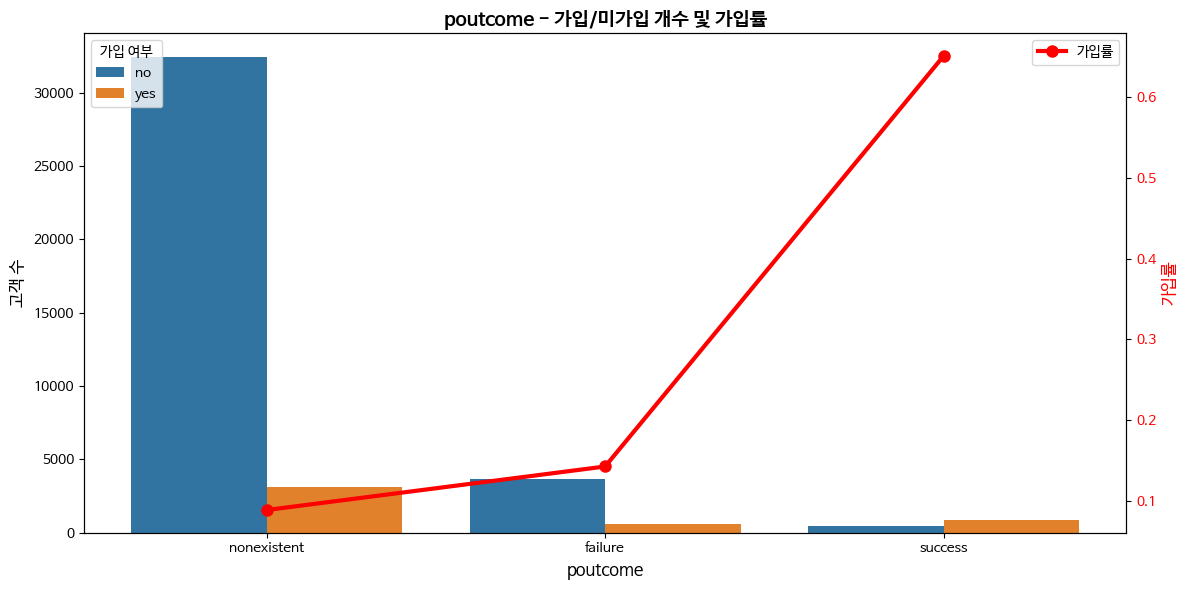

poutcome: 최고 가입률 = success(0.651)
      최저 가입률 = nonexistent(0.088)



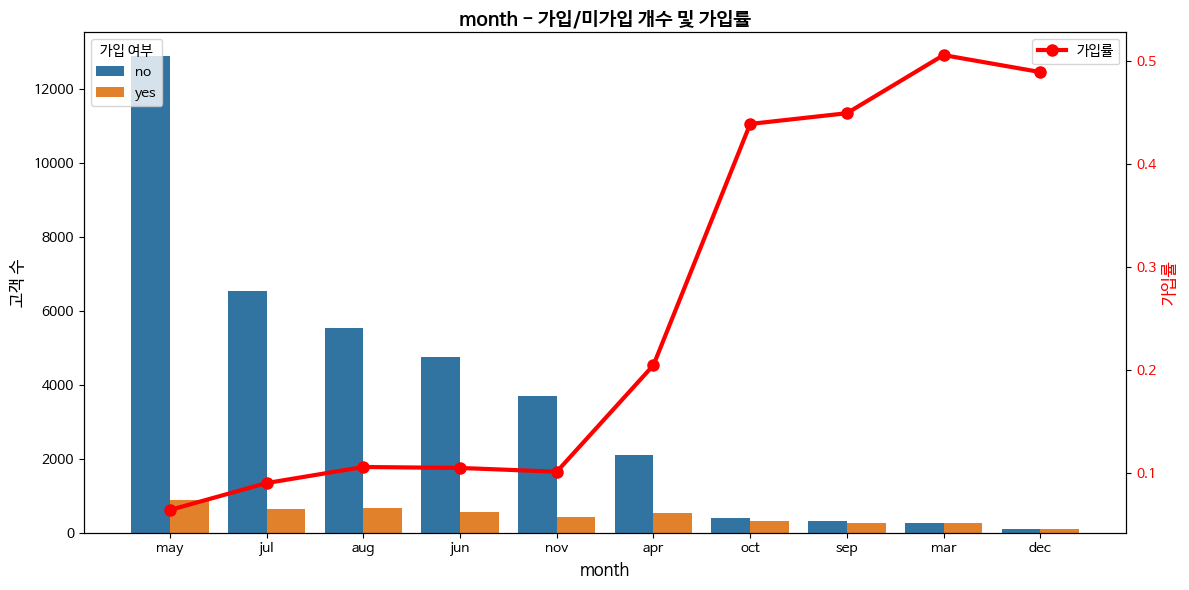

month: 최고 가입률 = mar(0.505)
      최저 가입률 = may(0.064)



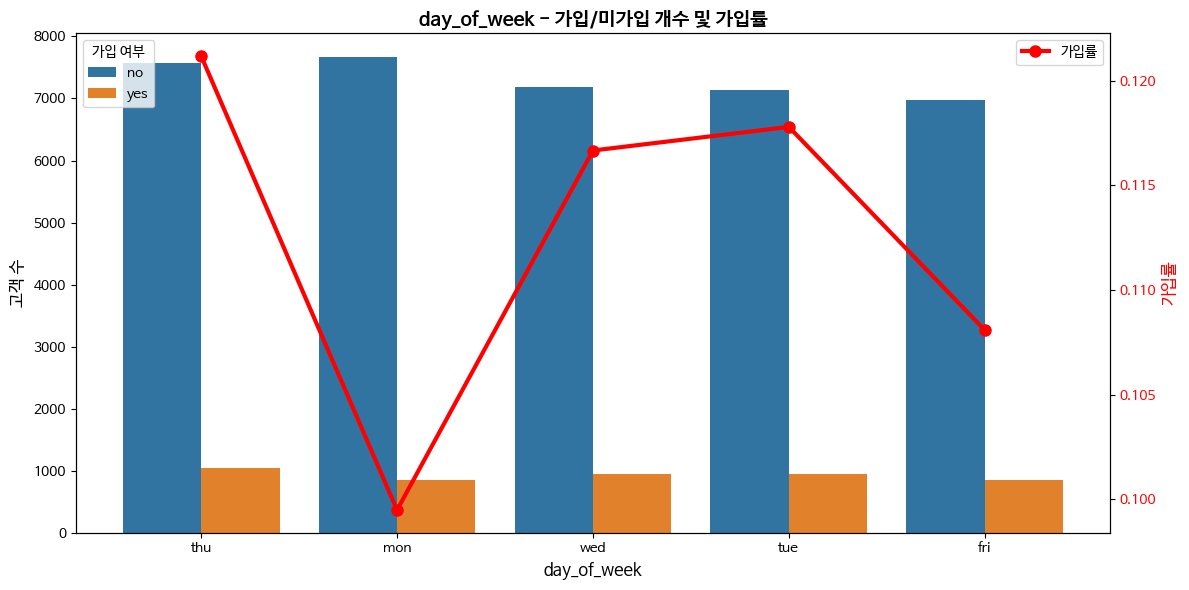

day_of_week: 최고 가입률 = thu(0.121)
      최저 가입률 = mon(0.099)



In [ ]:
# 범주형 변수별로 개별 차트 생성
categorical_cols=['job', 'marital', 'education', 'default', 'housing', 'loan','contact',
                  'poutcome', 'month', 'day_of_week']
for col in categorical_cols:
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # ✅ 카테고리 순서 미리 정의 (빈도순)
    order = bank[col].value_counts().index

    # 왼쪽 Y축: 가입/미가입 개수 (막대그래프)
    sns.countplot(x=col, hue='y', data=bank, order=order, ax=ax1)
    ax1.set_ylabel('고객 수', fontsize=12)
    ax1.set_xlabel(col, fontsize=12)

    # 오른쪽 Y축 생성: 가입률 (선그래프)
    ax2 = ax1.twinx()

    # 가입률 계산
    crosstab = pd.crosstab(bank[col], bank['y'])
    success_rate = crosstab['yes'] / (crosstab['yes'] + crosstab['no'])
    # ✅ 가입률도 같은 순서로 재정렬
    success_rate = success_rate.reindex(order)
    # 선그래프로 가입률 표시
    success_rate.plot(kind='line', ax=ax2, color='red',
                     marker='o', linewidth=3, markersize=8)
    ax2.set_ylabel('가입률', fontsize=12, color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # 제목과 범례
    ax1.set_title(f'{col} - 가입/미가입 개수 및 가입률', fontsize=14, fontweight='bold')
    ax1.legend(title='가입 여부', loc='upper left')
    ax2.legend(['가입률'], loc='upper right')

    # X축 라벨 회전
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 최고/최저 출력
    max_cat = success_rate.idxmax()
    min_cat = success_rate.idxmin()
    print(f"{col}: 최고 가입률 = {max_cat}({success_rate.max():.3f})")
    print(f"      최저 가입률 = {min_cat}({success_rate.min():.3f})\n")

- job 학생이 최고 가입률
- education illiterate 최고가입률
- contact 휴대폰이 최고 가입률
- poutcome 이전 성공이 최고 가입률

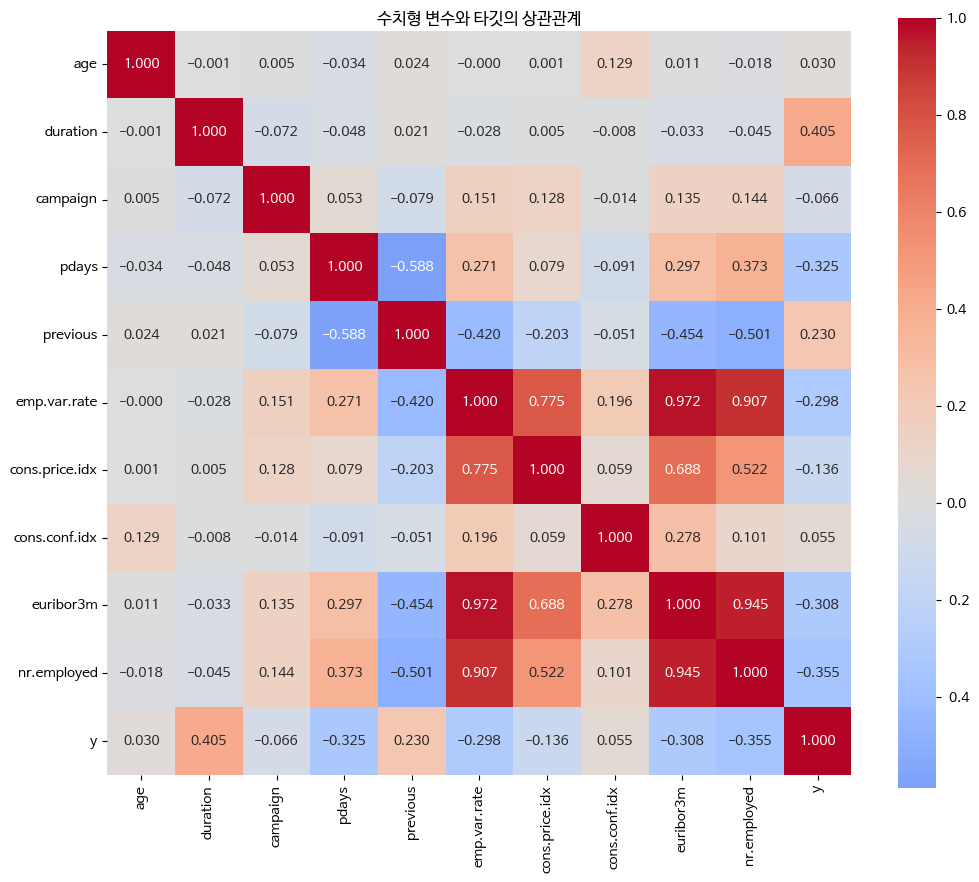


=== 타깃과의 상관관계 순위 ===
y                 1.000000
duration          0.405274
nr.employed       0.354678
pdays             0.324914
euribor3m         0.307771
emp.var.rate      0.298334
previous          0.230181
cons.price.idx    0.136211
campaign          0.066357
cons.conf.idx     0.054878
Name: y, dtype: float64


In [ ]:
# 수치형 변수들과 타깃의 상관관계
df_numeric = bank.copy()
df_numeric['y'] = (df_numeric['y'] == 'yes').astype(int)  # 수치화

correlation_matrix = df_numeric.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f')
plt.title('수치형 변수와 타깃의 상관관계')
plt.show()

# 타깃과의 상관관계 순위
target_corr = correlation_matrix['y'].abs().sort_values(ascending=False)
print("\n=== 타깃과의 상관관계 순위 ===")
print(target_corr.head(10))


#4 가설 수립

~1. 교육수준(education)이 높을수록 정기예금 가입율이 높을 것이다.
(교육 수준이 높을수록 현재보다는 미래를 위해 저축을 할 것이다.)~
education 가입률 최고 illiterate>university>high-school

2. 핸드폰(contact)으로 연락했을 때 정기예금 가입율이 높을 것이다.
(개인적인 업무이기에 유선전화를 꺼려할 수 있을 것이다.)

~3. 청장년층(30~~~45세)이 정기예금 가입율이 높을 것이다.
(경제활동을 활발히 하고 있는 나이대이기에 정기예금 가입율이 높을 것이다.)~age 최고 18-25

~4. 대출이 있으면 가입할 정기예금 가능성이 높을 것이다.
(주택대출이나 개인대출이 있다는 것은 주택 매매를 위해 대출을 했다는 것이고 결
론적으로 안정적인 거주환경이 구축되 있고, 여유가 있어 대출을 할 수 있다 판단.
여윳돈이 있어야 정기예금을 가입할 수 있다고 생각함.)~ loan no, housing 은 (loan vs y)	0.74	기각	대출 유·무에 따른 가입률 차이 없음 → 변수 삭제 또는 잔여 대출금 등 세부 정보 필요
무엇을 배웠나?
틀린 가설도 자산

기각된 변수(loan, 단순 age)는 모델에서 제거 → 과적합·다중공선성 완화

새 변수 아이디어(금융 지식, 잔여 대출금) 발굴.

채택된 가설은 바로 실행

휴대폰 DB 확보가 캠페인 ROI를 즉시 끌어올림.

부분 기각 가설은 세분화

연령층은 “18-25 세”, “26-54 세”, “55 세↑”처럼 재구간화 → 모델 예측력 ↑.

실패한 가설을 버리지 말고 “왜 틀렸는가?”를 기록하면 다음 실험의 설계도가 됩니다.

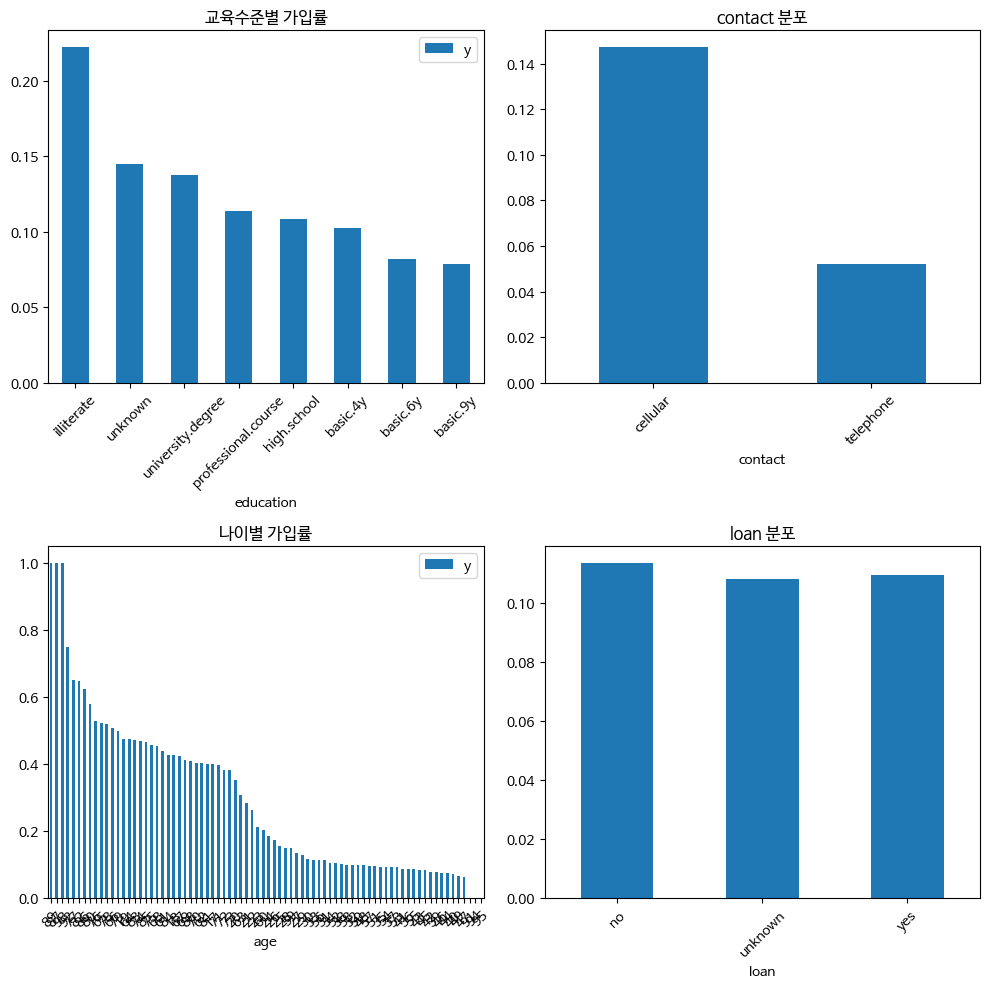

In [ ]:
# Ensure 'y_binary' exists
bank['y_binary'] = (bank['y'] == 'yes').astype(int)

# Ensure 'age_group' exists
bank['age_group'] = pd.cut(bank['age'], bins=[0, 30, 40, 50, 60, 100],
                         labels=['20대', '30대', '40대', '50대', '60대+'])

# Plotting code (kept as is)
plt.figure(figsize=(10, 10))
# education
plt.subplot(2, 2, 1)
edu_subscription = bank.groupby('education')['y'].apply(lambda x: (x=='yes').mean()).sort_values(ascending=False)
edu_subscription.plot(kind='bar', rot=45)
plt.title('교육수준별 가입률')
plt.legend()
plt.tight_layout()

# contact
plt.subplot(2, 2, 2)
contact_success = bank.groupby('contact')['y'].apply(lambda x: (x=='yes').sum() / len(x))
contact_success.plot(kind='bar', rot=45)
plt.title('contact 분포')
plt.tight_layout()

# age
plt.subplot(2, 2, 3)
age_subscription = bank.groupby('age')['y'].apply(lambda x: (x=='yes').mean()).sort_values(ascending=False)
age_subscription.plot(kind='bar', rot=45)
plt.title('나이별 가입률')
plt.legend()
plt.tight_layout()

# loan
plt.subplot(2, 2, 4)
loan_success = bank.groupby('loan')['y'].apply(lambda x: (x=='yes').sum() / len(x))
loan_success.plot(kind='bar', rot=45)
plt.title('loan 분포')
plt.tight_layout()
plt.show()


#3 결측치,중복값 확인


## 중복값

In [ ]:
# 중복값 개수, 중복 데이터 확인
print(bank.duplicated().sum()) # 12
bank[bank.duplicated()]

12


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_binary,age_group
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0,30대
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no,0,30대
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0,20대
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0,40대
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no,0,30대
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,0,50대
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,0,40대
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no,0,30대
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no,0,20대
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0,30대


In [ ]:
# 중복된 데이터
display(bank[bank.duplicated(keep=False)])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_binary,age_group
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0,30대
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0,30대
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no,0,30대
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no,0,30대
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0,20대
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0,20대
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0,40대
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,0,40대
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no,0,30대
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no,0,30대


### 중복제거

In [ ]:
# 중복제거
print(f"중복 제거 전: {bank.shape}")
bank = bank.drop_duplicates()
print(f"중복 제거 후: {bank.shape}")

중복 제거 전: (41188, 23)
중복 제거 후: (41176, 23)


## 결측치 처리
범주형 컬럼들에서 'unknown' 처리

In [ ]:
# 결측치 체크
# 컬럼별 결측치 확인
bank.isnull().sum().sort_values(ascending=False)
bank.isnull().sum().sum() # 0 nan 없음

np.int64(0)

## unknown

In [ ]:
# unknown 비율별 처리 전략
unknown_analysis = {}
# for col in ['job', 'marital', 'education', 'default', 'housing', 'loan']:
for col in bank.columns:
    unknown_count = (bank[col] == 'unknown').sum()
    unknown_ratio = (unknown_count / len(bank)) * 100
    unknown_analysis[col] = unknown_ratio
    if unknown_count>0:
        print(f"{col}: {unknown_count:,}개 ({unknown_ratio:.1f}%)")

# 처리 방법 결정
# 1% 미만: 최빈값 대체 또는 삭제
# 1-10%: 별도 카테고리로 유지 또는 다중 대체
# 10% 이상: 반드시 별도 카테고리로 유지 (의미있는 정보일 가능성)


job: 330개 (0.8%)
marital: 80개 (0.2%)
education: 1,730개 (4.2%)
default: 8,596개 (20.9%)
housing: 990개 (2.4%)
loan: 990개 (2.4%)


In [ ]:
unknown_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']
unknown_rows = bank[
    (bank['job'] == 'unknown') |
    (bank['marital'] == 'unknown') |
    (bank['education'] == 'unknown') |
    (bank['default'] == 'unknown') |
    (bank['housing'] == 'unknown') |
    (bank['loan'] == 'unknown')
]
display(unknown_rows)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_binary,age_group
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,50대
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,40대
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,40대
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,40대
15,54,retired,married,basic.9y,unknown,yes,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,50대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41118,34,technician,married,unknown,no,yes,no,cellular,nov,tue,...,2,failure,-1.1,94.767,-50.8,1.046,4963.6,no,0,30대
41120,60,admin.,married,unknown,no,no,no,cellular,nov,tue,...,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,no,0,50대
41122,34,technician,married,unknown,no,no,no,cellular,nov,tue,...,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,yes,1,30대
41135,54,technician,married,unknown,no,yes,no,cellular,nov,thu,...,1,failure,-1.1,94.767,-50.8,1.041,4963.6,no,0,50대


0    30478
1     9032
2     1338
3      306
4       20
5        2
Name: count, dtype: int64
   unknown_count  yes_ratio
0              0   0.126583
1              1   0.069531
2              2   0.097160
3              3   0.075163
4              4   0.000000
5              5   0.000000


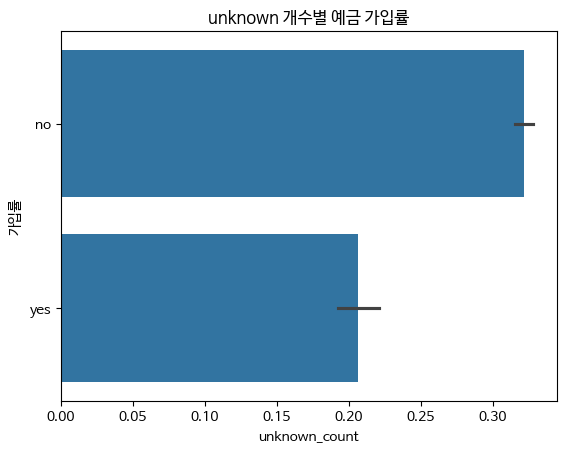

In [ ]:
unknown_rows['y'].value_counts()
unknown_rows['y'].value_counts(normalize=True)
unknown_rows.shape[0]/bank.shape[0]
# unknown 개수 세기
unknown_count = (bank == 'unknown').sum(axis=1)

# 4개 이상이면 삭제
# df = df[unknown_count < 4]
print(unknown_count.value_counts())
# unknown 개수 계산
bank['unknown_count'] = (bank == 'unknown').sum(axis=1)

# 개수별 yes 비율
yes_ratio_by_unknown = (
    bank.groupby('unknown_count')['y']
      .apply(lambda x: (x == 'yes').mean())
      .reset_index(name='yes_ratio')
)

print(yes_ratio_by_unknown)

sns.barplot(x='unknown_count', y='y', data=bank, estimator=lambda x: sum(x)/len(x))
plt.title("unknown 개수별 예금 가입률")
plt.ylabel("가입률")
plt.show()

- unknown 4개 이상 제거

In [ ]:
bank = bank[bank['unknown_count'] < 4]
bank.shape

(41154, 24)

#6 EDA 수행

In [ ]:
df = bank.copy()
# y['no' 'yes'] 0:no , 1:yes 변경
df['y_binary'] = (df['y'] == 'yes').astype(int)

In [ ]:
# 2.job['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
#         'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
#         'student']
# 3.marital['married' 'single' 'divorced' 'unknown']
categorical_cols = ['job', 'marital',
                    # 'education',
                    # 'default', 'housing', 'loan'
                    ]
for col in categorical_cols:
    df[col + '_encoded'] = LabelEncoder().fit_transform(df[col])

In [ ]:
# 4.education['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
#         'unknown' 'university.degree' 'illiterate']
edu_order = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6,
    'unknown': -1  # 또는 NaN
}
df['education_encoded'] = df['education'].map(edu_order)


In [ ]:
# 5.default['no' 'unknown' 'yes']
# pd.get_dummies(df['default'], prefix='default') #  원 핫 인코딩
default_order = {
    'no': 0,
    'unknown': 1,
    'yes': 2
}
df['default_encoded'] = df['default'].map(default_order)
# 6.housing['no' 'yes' 'unknown']
# 7.loan['no' 'yes' 'unknown']
df['housing_encoded'] = df['housing'].map(default_order)
df['loan_encoded'] = df['loan'].map(default_order)

In [ ]:
df.contact.value_counts()
df['contact_encoded']=df['contact'].map({'telephone': 0, 'cellular': 1})

In [ ]:
# 15.poutcome ['nonexistent' 'failure' 'success']
p_order = {
    'failure': 0,
    'success': 1,
    'nonexistent': -1  # 또는 NaN
}
df['poutcome_encoded'] = df['poutcome'].map(p_order)


In [ ]:
# 9.month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
# 10.day_of_week['mon' 'tue' 'wed' 'thu' 'fri']
month_mapping = {'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5,
                 'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11}
df['month_nums'] = df['month'].map(month_mapping)+1

# 2. day_of_week 처리
day_mapping = {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4}
df['day'] = df['day_of_week'].map(day_mapping)+1
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,contact_encoded,poutcome_encoded,month_nums,day
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,3,1,1,0,0,0,0,-1,5,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,7,1,4,1,0,0,0,-1,5,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,7,1,4,0,2,0,0,-1,5,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,1,2,0,0,0,0,-1,5,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,7,1,4,0,0,2,0,-1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,5,1,5,0,2,0,1,-1,11,5
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,1,5,0,0,0,1,-1,11,5
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,5,1,6,0,2,0,1,-1,11,5
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,9,1,5,0,0,0,1,-1,11,5


In [ ]:
# 13.pdays 0 ~962.4754540157328~ 999
# 4. pdays 처리
df['pdays'] = df['pdays'].replace(999, -1)
# df['pdays_processed'] = df['pdays'].replace(999, -1)
# df['pdays'].value_counts()
# df['contacted_before'] = df['pdays'].apply(lambda x: 0 if x == 999 else 1)


In [ ]:

display(df)
df.columns

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,contact_encoded,poutcome_encoded,month_nums,day
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,3,1,1,0,0,0,0,-1,5,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,7,1,4,1,0,0,0,-1,5,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,7,1,4,0,2,0,0,-1,5,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,1,2,0,0,0,0,-1,5,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,7,1,4,0,0,2,0,-1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,5,1,5,0,2,0,1,-1,11,5
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,1,5,0,0,0,1,-1,11,5
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,5,1,6,0,2,0,1,-1,11,5
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,9,1,5,0,0,0,1,-1,11,5


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_binary',
       'age_group', 'unknown_count', 'job_encoded', 'marital_encoded',
       'education_encoded', 'default_encoded', 'housing_encoded',
       'loan_encoded', 'contact_encoded', 'poutcome_encoded', 'month_nums',
       'day'],
      dtype='object')

#7 변수 생성

In [ ]:
# 날짜 순환형 변수 (month, day_of_week)
# month 처리 (12개월 순환)
month_mapping = {'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5,
                 'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11}
month_nums = df['month'].map(month_mapping)
df['month_sin'] = np.sin(2 * np.pi * month_nums / 12)
df['month_cos'] = np.cos(2 * np.pi * month_nums / 12)

# day_of_week 처리 (5일 순환)
day_mapping = {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4}
day_nums = df['day_of_week'].map(day_mapping)
df['day_sin'] = np.sin(2 * np.pi * day_nums / 5)
df['day_cos'] = np.cos(2 * np.pi * day_nums / 5)

In [ ]:
# ── (1) 누수 없는 핵심 수치형 ─────────────────────────
num_base = ['age',               # 인적 정보
            'previous',          # 과거캠페인 수
            'euribor3m']         # 경제 대표 1개
num_all = ['age', 'duration',
       'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
num = ['age',# 'duration',
       'campaign', 'pdays', 'previous',
       #'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed']

# ── (2) 주요 범주형 → ───────────────────────────
col_base = ['job_encoded', 'marital_encoded', 'education_encoded',
       'contact_encoded','poutcome_encoded']
col_all = ['job_encoded', 'marital_encoded', 'education_encoded',
       'default_encoded', 'housing_encoded', 'loan_encoded',
       'contact_encoded','poutcome_encoded']

# ── (3) 합치기 ───────────────────────────────────────
y = df['y_binary']
X_base = pd.concat([df[num_base], df[col_base]], axis=1)

X = pd.concat([
    df[num_all],                   # 수치형
    df[col_all],               # encoded
    df[['month_nums', 'day']], # 날짜
], axis=1)

X1 = pd.concat([
    df[num],                   # 수치형
    df[col_all],               # encoded
    df[['month_nums', 'day']], # 날짜
], axis=1)

X2 = pd.concat([
    df[num],                   # 수치형
    df[col_all],               # encoded
    df[['month_sin', 'month_cos', 'day_sin', 'day_cos']], # 순환형
], axis=1)



#8 모델 구축

## 로지스틱 회귀

로지스틱 회귀, 랜덤포레스트, SVM, XGBoost

## 로지스틱 회귀

In [ ]:

def evaluate_model(y_true, y_pred, y_prob):
    """
    y_true : 실제 라벨 (0/1)
    y_pred : 예측 라벨 (0/1)
    y_prob : 양성 클래스(1)에 대한 예측 확률
    """
    metrics = {}
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['Balanced Accuracy'] = balanced_accuracy_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred, zero_division=0)
    metrics['Recall'] = recall_score(y_true, y_pred, zero_division=0)
    metrics['F1'] = f1_score(y_true, y_pred, zero_division=0)
    metrics['ROC-AUC'] = roc_auc_score(y_true, y_prob)
    metrics['PR-AUC'] = average_precision_score(y_true, y_prob)
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)

    return metrics

# 비교할 데이터셋 딕셔너리
datasets = {
    'X_base': X_base,
    'X': X,
    'X1': X1,
    'X2': X2
}

results = []

for name, X_data in datasets.items():
    # 1. 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y, test_size=0.2, random_state=42, stratify=y
    )

    # 2. 스케일링 (수치형 변수에만 적용)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 3. 로지스틱 회귀 학습
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_scaled, y_train)

    # 4. 예측
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # 5. 성능 지표 계산
    met = evaluate_model(y_test, y_pred, y_proba)
    met['Feature_Set']=name
    results.append(met)

# 결과를 표로 변환
results_df = pd.DataFrame(results)
print(results_df)

   Accuracy  Balanced Accuracy  Precision    Recall        F1   ROC-AUC  \
0  0.890293           0.527109   0.650602  0.058190  0.106825  0.764156   
1  0.907423           0.683035   0.647163  0.393319  0.489276  0.929755   
2  0.896853           0.577369   0.674009  0.164871  0.264935  0.785795   
3  0.896124           0.577428   0.655319  0.165948  0.264832  0.788559   

     PR-AUC       MCC Feature_Set  
0  0.369798  0.171636      X_base  
1  0.578182  0.458286           X  
2  0.427676  0.298851          X1  
3  0.428279  0.294093          X2  


F1: X가 0.516으로 가장 높음 → Precision과 Recall 균형이 가장 좋음

ROC-AUC: X가 0.934로 압도적 → 전반적인 분류 능력 우수

PR-AUC: X가 0.592로 가장 높음 → 불균형 데이터에서 양성 클래스 식별력이 뛰어남

MCC: X가 0.485로 가장 높음 → 전반적인 예측 품질이 안정적
- X 가 duration 있어서 젤 높음
- X1 점수 더 높여보자

In [ ]:
datasets = {
    'X_base': X_base,
    'X': X,
    'X1': X1,
    'X2': X2
}

# 모델 사전
models = {'rf':RandomForestClassifier(class_weight='balanced',random_state=42),
          'logit':LogisticRegressionCV(penalty='l1',solver='liblinear',cv=5),
          'xgb':XGBClassifier(scale_pos_weight=10,colsample_bytree=0.5,
                              learning_rate=0.05,n_estimators=400)}

results = []

for feature_name, X_data in datasets.items():
    for model_name, model in models.items():
        # 1. 데이터 분할
        X_train, X_test, y_train, y_test = train_test_split(
            X_data, y, test_size=0.2, random_state=42, stratify=y
        )

        # 2. 스케일링
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # 3. 모델 학습
        model.fit(X_train_scaled, y_train)

        # 4. 예측
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]

        # 5. 성능 지표 계산
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba)

        # 결과 저장
        results.append({
            'Feature_Set': feature_name,
            'Model': model_name,
            'Accuracy': round(acc, 4),
            'F1_Score': round(f1, 4),
            'ROC_AUC': round(auc, 4)
        })


# 결과를 표로 변환
results_df = pd.DataFrame(results)
print(results_df)

   Feature_Set  Model  Accuracy  F1_Score  ROC_AUC
0       X_base     rf    0.8614    0.3196   0.7583
1       X_base  logit    0.8903    0.1068   0.7642
2       X_base    xgb    0.8140    0.4475   0.7981
3            X     rf    0.9148    0.5498   0.9468
4            X  logit    0.9077    0.4906   0.9298
5            X    xgb    0.8739    0.6239   0.9520
6           X1     rf    0.8930    0.3527   0.7831
7           X1  logit    0.8965    0.2565   0.7857
8           X1    xgb    0.8127    0.4413   0.7979
9           X2     rf    0.8943    0.3687   0.7770
10          X2  logit    0.8965    0.2668   0.7885
11          X2    xgb    0.8156    0.4484   0.7985


In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
import numpy as np
import pandas as pd
from xgboost import XGBClassifier

def summarize_cv(cv_result):
    """
    cross_validate 결과 딕셔너리를 받아서
    각 metric의 평균(mean)과 표준편차(std)를 DataFrame으로 반환
    """
    summary = {}
    for k, v in cv_result.items():
        if k.startswith("test_"):
            metric = k.replace("test_", "")
            summary[metric] = {
                "mean": np.mean(v),
                "std": np.std(v)
            }
    return pd.DataFrame(summary).T

# XGBoost
xgb_base = XGBClassifier(
    n_estimators=600,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

# 1. 스코어링 정의
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0),
    'f1': make_scorer(f1_score, zero_division=0),
    'roc_auc': make_scorer(roc_auc_score),
    'pr_auc': make_scorer(average_precision_score)
}

# 2. Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


cv_res = cross_validate(xgb_base, X1, y, cv=cv, scoring=scoring, n_jobs=-1)
summarize_cv(cv_res)

,mean,std
accuracy,0.896268,0.002362
precision,0.580816,0.021000
recall,0.287128,0.016113
f1,0.384081,0.017308
roc_auc,0.630391,0.007971
pr_auc,0.247299,0.011897


In [ ]:
# 불균형 가중치

neg, pos = np.bincount(y)
spw = neg / pos

xgb_w = XGBClassifier(
    n_estimators=600,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    scale_pos_weight=spw,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

cv_res_w = cross_validate(xgb_w, X, y, cv=cv, scoring=scoring, n_jobs=-1)
summarize_cv(cv_res_w)

,mean,std
accuracy,0.897556,0.003667
precision,0.531393,0.011744
recall,0.777107,0.007355
f1,0.631109,0.009220
roc_auc,0.844982,0.004283
pr_auc,0.438098,0.010381


In [ ]:
# 임계값 튜닝
from sklearn.model_selection import cross_val_predict

def best_threshold_for_f1(model, X, y, cv):
    proba = cross_val_predict(model, X, y, cv=cv, method="predict_proba")[:,1]
    ths = np.linspace(0.05, 0.95, 181)
    f1s = [f1_score(y, (proba >= t).astype(int)) for t in ths]
    t_star = ths[int(np.argmax(f1s))]
    return t_star, max(f1s)

t_star, f1_star = best_threshold_for_f1(xgb_w, X, y, cv)
t_star, f1_star


(np.float64(0.49999999999999994), 0.6310169788202346)

In [ ]:
# GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint, uniform

param_dist = {
    "n_estimators": randint(400, 1200),
    "learning_rate": uniform(0.02, 0.18),
    "max_depth": randint(3, 9),
    "min_child_weight": randint(1, 11),
    "subsample": uniform(0.7, 0.3),
    "colsample_bytree": uniform(0.6, 0.4),
    "gamma": uniform(0.0, 5.0),
    "reg_lambda": uniform(0.0, 5.0),
    "reg_alpha": uniform(0.0, 2.0),
    "scale_pos_weight": uniform(max(1.0, spw*0.7), spw*0.6)  # spw 주변 탐색
}

rand = RandomizedSearchCV(
    XGBClassifier(eval_metric="logloss", random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=60,
    scoring="f1",
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
rand.fit(X, y)
rand.best_params_, rand.best_score_

# Grid로 미세 조정
base = rand.best_params_
grid = GridSearchCV(
    XGBClassifier(eval_metric="logloss", random_state=42, n_jobs=-1, **{k: base[k] for k in base if k != "learning_rate"}),
    param_grid={"learning_rate": [max(0.01, base["learning_rate"]*r) for r in [0.5, 0.75, 1.0, 1.25]]},
    scoring="f1",
    cv=cv,
    n_jobs=-1
)
grid.fit(X, y)
grid.best_params_, grid.best_score_


Fitting 5 folds for each of 60 candidates, totalling 300 fits


({'learning_rate': np.float64(0.029313020773753674)},
 np.float64(0.6475646152837398))

In [ ]:
# 로지스틱 회귀 비교선
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as IMBPipeline

smote_xgb = IMBPipeline(steps=[
    ("smote", SMOTE(k_neighbors=3, random_state=42)),
    ("clf", XGBClassifier(
        n_estimators=base.get("n_estimators", 800),
        learning_rate=base.get("learning_rate", 0.08),
        max_depth=base.get("max_depth", 6),
        min_child_weight=base.get("min_child_weight", 5),
        subsample=base.get("subsample", 0.9),
        colsample_bytree=base.get("colsample_bytree", 0.8),
        gamma=base.get("gamma", 0.5),
        reg_lambda=base.get("reg_lambda", 1.0),
        reg_alpha=base.get("reg_alpha", 0.0),
        # SMOTE를 쓰면 scale_pos_weight는 보통 끄는 걸 추천
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1
    ))
])

cv_res_smote = cross_validate(smote_xgb, X, y, cv=cv, scoring=scoring, n_jobs=-1)
summarize_cv(cv_res_smote)


,mean,std
accuracy,0.906911,0.002320
precision,0.575826,0.010405
recall,0.662857,0.006767
f1,0.616213,0.006327
roc_auc,0.800386,0.003225
pr_auc,0.419687,0.007257


 # 멘토평

 매우 우수한 완성도를 보여줍니다. 특히 프로젝트 기획 단계에서 미션의 목표와 요구사항을 완벽하게 이해하고 있으며, 포르투갈 은행 마케팅 데이터 분석에 대한 상세한 배경 지식과 데이터 설명을 체계적으로 정리했습니다. 문서화 품질이 뛰어나 분석 과정을 쉽게 따라갈 수 있으며, 미션 소개부터 데이터 소개, 제출 요구사항까지 모든 내용을 빠짐없이 포함했습니다. 코드 구조도 체계적이고 가독성이 높습니다. 다만 실제 분석과 모델링 부분에서 더 깊이 있는 하이퍼파라미터 튜닝이나 고급 성능 개선 기법들이 추가되었다면 더욱 완벽한 프로젝트가 되었을 것입니다.